In [39]:
# !pip install xgboost

In [40]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor

MY_PATH = 'C:\\Users\\배진우\\Documents\\multiCampus_TA\\python_data\\'

df = pd.read_csv(MY_PATH + 'titanic_train.csv')
df.head(3)
# df.info()
# df.isnull().sum()   # 결측치 개수 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [41]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', \
                                   'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'].value_counts()


Mr        517
Miss      185
Mrs       126
Master     40
Others     23
Name: Title, dtype: int64

In [42]:
df['Fare'] = df['Fare'] / (df['SibSp'] + df['Parch'] + 1)

# 결측치 처리. Cabin은 결측치가 너무 많아서 drop.
# df['Age'].fillna(df['Age'].mean(), inplace = True)  # 평균으로 대체 --> 나중에 regression을 추정해 볼 것.
df['Embarked'].fillna('N', inplace = True)
# df.isnull().sum()   # 결측치 개수 확인

In [43]:
# 불필요한 feature를 제거한다.
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,3.62500,S,Mr
1,1,1,female,38.0,1,0,35.64165,C,Mrs
2,1,3,female,26.0,0,0,7.92500,S,Miss
3,1,1,female,35.0,1,0,26.55000,S,Mrs
4,0,3,male,35.0,0,0,8.05000,S,Mr


In [52]:
# XGBoost를 이용해서 Age의 결측치를 추정해 보자 (survived 이용 x)

df_dummies = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title'])
df_dummies

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_N,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,0,3,22.0,1,0,3.62500,0,1,0,0,0,1,0,0,1,0,0
1,1,1,38.0,1,0,35.64165,1,0,1,0,0,0,0,0,0,1,0
2,1,3,26.0,0,0,7.92500,1,0,0,0,0,1,0,1,0,0,0
3,1,1,35.0,1,0,26.55000,1,0,0,0,0,1,0,0,0,1,0
4,0,3,35.0,0,0,8.05000,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.00000,0,1,0,0,0,1,0,0,0,0,1
887,1,1,19.0,0,0,30.00000,1,0,0,0,0,1,0,1,0,0,0
888,0,3,NaN,1,2,5.86250,1,0,0,0,0,1,0,1,0,0,0
889,1,1,26.0,0,0,30.00000,0,1,1,0,0,0,0,0,1,0,0


In [ ]:
# 불필요한 feature를 제거한다.
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df.head()

In [116]:
df_dummies['Age'].fillna(pd.Series(y_pred), inplace=True)


NameError: name 'y_pred' is not defined

In [105]:
df_dummies[df_dummies['Age'].isna()]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_N,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
5,0,3,NaN,0,0,8.458300,0,1,0,0,1,0,0,0,1,0,0
17,1,2,NaN,0,0,13.000000,0,1,0,0,0,1,0,0,1,0,0
19,1,3,NaN,0,0,7.225000,1,0,1,0,0,0,0,0,0,1,0
26,0,3,NaN,0,0,7.225000,0,1,1,0,0,0,0,0,1,0,0
28,1,3,NaN,0,0,7.879200,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,NaN,0,0,7.229200,0,1,1,0,0,0,0,0,1,0,0
863,0,3,NaN,8,2,6.322727,1,0,0,0,0,1,0,1,0,0,0
868,0,3,NaN,0,0,9.500000,0,1,0,0,0,1,0,0,1,0,0
878,0,3,NaN,0,0,7.895800,0,1,0,0,0,1,0,0,1,0,0


In [82]:
df_age_test = df_dummies[df_dummies['Age'].isna()]
df_age_test = df_age_test.drop(['Survived'], axis=1)
# df_age_test = df_age_test.drop(['Age'], axis=1)

In [83]:
df_age_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_N,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
5,3,NaN,0,0,8.458300,0,1,0,0,1,0,0,0,1,0,0
17,2,NaN,0,0,13.000000,0,1,0,0,0,1,0,0,1,0,0
19,3,NaN,0,0,7.225000,1,0,1,0,0,0,0,0,0,1,0
26,3,NaN,0,0,7.225000,0,1,1,0,0,0,0,0,1,0,0
28,3,NaN,0,0,7.879200,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,3,NaN,0,0,7.229200,0,1,1,0,0,0,0,0,1,0,0
863,3,NaN,8,2,6.322727,1,0,0,0,0,1,0,1,0,0,0
868,3,NaN,0,0,9.500000,0,1,0,0,0,1,0,0,1,0,0
878,3,NaN,0,0,7.895800,0,1,0,0,0,1,0,0,1,0,0


In [55]:
df_age_train = df_dummies.dropna(axis=0)
df_age_train_target = df_age_train['Age']
df_age_train = df_age_train.drop(['Survived'], axis=1)
df_age_train = df_age_train.drop(['Age'], axis=1)

In [56]:
df_age_train

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_N,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,3,1,0,3.625000,0,1,0,0,0,1,0,0,1,0,0
1,1,1,0,35.641650,1,0,1,0,0,0,0,0,0,1,0
2,3,0,0,7.925000,1,0,0,0,0,1,0,1,0,0,0
3,1,1,0,26.550000,1,0,0,0,0,1,0,0,0,1,0
4,3,0,0,8.050000,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,3,0,5,4.854167,1,0,0,0,1,0,0,0,0,1,0
886,2,0,0,13.000000,0,1,0,0,0,1,0,0,0,0,1
887,1,0,0,30.000000,1,0,0,0,0,1,0,1,0,0,0
889,1,0,0,30.000000,0,1,1,0,0,0,0,0,1,0,0


In [57]:
df_age_train_target = pd.DataFrame(df_age_train_target)

In [58]:
df_age_train_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     714 non-null    float64
dtypes: float64(1)
memory usage: 11.2 KB


In [60]:
model = XGBRegressor() # default로 학습
model.fit(df_age_train, df_age_train_target)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [64]:
predict_age = np.round(model.predict(df_age_test))
predict_age

array([36., 32., 34., 32., 19., 28., 20., 23., 26., 31., 31., 47., 23.,
       23., 38., 40.,  6., 28., 31., 17., 31., 31., 28., 29., 16., 31.,
       45.,  7., 28., 29., 26.,  7., 47., 49.,  4., 17., 26., 34., 43.,
       45., 23., 17., 21., 28.,  5., 24., 15., 24., 31., 47., 45., 23.,
       49., 23., 33., 57., 40., 43., 23., 44., 29., 31., 30., 17., 22.,
       18., 28., 27., 63., 32., 19., 19., 47., 31., 23., 30., 28., 21.,
        5., 28., 28., 33., 33., 31., 31., 45., 27., 20., 22., 31., 40.,
       45., 31., 33., 21., 31., 48., 33.,  5., 22., 22., 19., 16., 49.,
       31., 38., 32., 26., 33., 26., 36., 21., 31., 39., 36., 45., 31.,
       25., 26., 23., 21., 30., 31.,  8., 17., 32., 28., 46., 28., 24.,
       45., 21., 39., 28., 29., 38., 28., 19., 28., 29., 36., 33., 10.,
       29., 16.,  6., 49., 23., 18., 33., 28., 28., 52., 21., 46., 26.,
       32., 45., 25., 26., 45., 17., 56., 39., 28., 29., 45., 26., 31.,
       58., 17., 42., 26., 17., 26., 28.,  9.], dtype=float32)

In [67]:
df_dummies.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_N', 'Embarked_Q', 'Embarked_S',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others'],
      dtype='object')

In [77]:
concat_data2 = df_dummies[df_dummies['Age'].isna()]
concat_data2['Age'] = predict_age
concat_data2

C:\Users\배진우\AppData\Local\Temp/ipykernel_20044/2112669554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concat_data2['Age'] = predict_age


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_N,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
5,0,3,36.0,0,0,8.458300,0,1,0,0,1,0,0,0,1,0,0
17,1,2,32.0,0,0,13.000000,0,1,0,0,0,1,0,0,1,0,0
19,1,3,34.0,0,0,7.225000,1,0,1,0,0,0,0,0,0,1,0
26,0,3,32.0,0,0,7.225000,0,1,1,0,0,0,0,0,1,0,0
28,1,3,19.0,0,0,7.879200,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,26.0,0,0,7.229200,0,1,1,0,0,0,0,0,1,0,0
863,0,3,17.0,8,2,6.322727,1,0,0,0,0,1,0,1,0,0,0
868,0,3,26.0,0,0,9.500000,0,1,0,0,0,1,0,0,1,0,0
878,0,3,28.0,0,0,7.895800,0,1,0,0,0,1,0,0,1,0,0


In [78]:
concat_data1 = df_dummies.dropna(axis=0)
concat_data1

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_N,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,0,3,22.0,1,0,3.625000,0,1,0,0,0,1,0,0,1,0,0
1,1,1,38.0,1,0,35.641650,1,0,1,0,0,0,0,0,0,1,0
2,1,3,26.0,0,0,7.925000,1,0,0,0,0,1,0,1,0,0,0
3,1,1,35.0,1,0,26.550000,1,0,0,0,0,1,0,0,0,1,0
4,0,3,35.0,0,0,8.050000,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,4.854167,1,0,0,0,1,0,0,0,0,1,0
886,0,2,27.0,0,0,13.000000,0,1,0,0,0,1,0,0,0,0,1
887,1,1,19.0,0,0,30.000000,1,0,0,0,0,1,0,1,0,0,0
889,1,1,26.0,0,0,30.000000,0,1,1,0,0,0,0,0,1,0,0


In [94]:
concated_df = pd.concat([concat_data1, concat_data2])
concated_df.reset_index(inplace=True)
concated_df

,index,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_N,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,0,0,3,22.0,1,0,3.625000,0,1,0,0,0,1,0,0,1,0,0
1,1,1,1,38.0,1,0,35.641650,1,0,1,0,0,0,0,0,0,1,0
2,2,1,3,26.0,0,0,7.925000,1,0,0,0,0,1,0,1,0,0,0
3,3,1,1,35.0,1,0,26.550000,1,0,0,0,0,1,0,0,0,1,0
4,4,0,3,35.0,0,0,8.050000,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,859,0,3,26.0,0,0,7.229200,0,1,1,0,0,0,0,0,1,0,0
887,863,0,3,17.0,8,2,6.322727,1,0,0,0,0,1,0,1,0,0,0
888,868,0,3,26.0,0,0,9.500000,0,1,0,0,0,1,0,0,1,0,0
889,878,0,3,28.0,0,0,7.895800,0,1,0,0,0,1,0,0,1,0,0


In [106]:
concated_df.to_csv(MY_PATH + 'titanic_train_clean.csv', index=False)

In [95]:
train_X = concated_df.drop(['Survived'], axis=1)
train_Y = concated_df['Survived']

In [87]:
from xgboost import XGBClassifier

In [115]:
trainX, testX, trainY, testY = train_test_split(train_X, train_Y, test_size = 0.2)

model = XGBClassifier(objective='binary:logistic')
model.fit(trainX, trainY)

# Test 세트의 Feature에 대한 class를 추정하고, 정확도를 계산한다
# accuracy = model.score(testX, testY)와 동일함.
predY = model.predict(testX)
accuracy = (testY == predY).mean()
print()
print("* 시험용 데이터로 측정한 정확도 = %.2f" % accuracy)

# Train 세트의 Feature에 대한 class를 추정하고, 정확도를 계산한다
predY = model.predict(trainX)
accuracy = (trainY == predY).mean()
print("* 학습용 데이터로 측정한 정확도 = %.2f" % accuracy)

[11:34:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

* 시험용 데이터로 측정한 정확도 = 0.83
* 학습용 데이터로 측정한 정확도 = 1.00


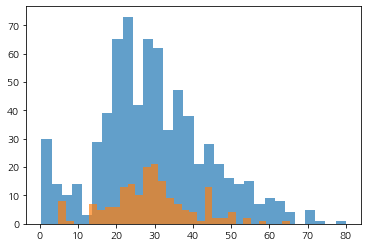

[14:23:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
정확도 = 0.810


C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [119]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor, XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

MY_PATH = 'C:\\Users\\배진우\\Documents\\multiCampus_TA\\python_data\\'

df = pd.read_csv(MY_PATH + 'titanic_train.csv')
df.head(3)
# df.info()
# df.isnull().sum()   # 결측치 개수 확인

df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', \
                                   'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'].value_counts()

df['Fare'] = df['Fare'] / (df['SibSp'] + df['Parch'] + 1)

df.head()

# 결측치 처리. Cabin은 결측치가 너무 많아서 drop.
df['Embarked'].fillna('N', inplace = True)
# df.isnull().sum()   # 결측치 개수 확인

# 불필요한 feature를 제거한다.
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df.head()

# Label encoding
# Tree 계열인 XGBRegressor를 사용할 것이므로 nominal feature들을
# one-hot encoding이 아닌 label encoding을 사용해도 된다.
# SVM, Deep Learning 등 Tree 계열이 아닌 것을 사용하려면 
# one-hot encoding을 사용해야 한다.
for col in ['Sex', 'Embarked', 'Title']:
    enc = LabelEncoder()
    df[col] = enc.fit_transform(df[col])

df.head()

# XGBoost를 이용해서 Age의 결측치를 추정해 보자
# Age feature는 177개가 결측치이다 (NaN).
# 다른 feature들을 이용해서 regression으로 Age를 추정한다.
x_normal = df.dropna()          # Age가 정상인 데이터
x_nan = df[df['Age'].isnull()]  # Age가 NaN인 데이터

# 학습 데이터 생성
x_train = np.array(x_normal.drop(['Age', 'Survived'], axis=1))
y_train = np.array(x_normal['Age'])
x_test = np.array(x_nan.drop(['Age', 'Survived'], axis=1))

# regression tree를 생성한다.
reg_model = XGBRegressor(objective='reg:squarederror')
reg_model.fit(x_train, y_train)

# Age = NaN인 데이터를 추정하고, 정상 데이터와 추정 데이터를 합친다.
x_nan = x_nan.drop('Age', axis=1)
x_nan['Age'] = reg_model.predict(x_test)

dfp = pd.concat([x_normal, x_nan])

# Age가 정상인 분포와 추정한 분포를 육안으로 비교한다.
plt.hist(x_normal['Age'], bins=30, alpha=0.7)
plt.hist(x_nan['Age'], bins=30, alpha=0.7)
plt.show()

# 최종 학습 : 생존자 추정 성능 평가
x_feat = np.array(dfp.drop('Survived', axis=1))
x_target = np.array(dfp['Survived'])

x_train, x_test, y_train, y_test = train_test_split(x_feat, x_target, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

# XGBoost (classifier)로 Train 데이터 세트를 학습한다.
clf_model = XGBClassifier(objective='binary:logistic')
clf_model.fit(x_train, y_train)

# 정확도를 측정한다.
acc = clf_model.score(x_test, y_test)
print('정확도 = {:.3f}'.format(acc))
